## Тренировка моделей Логистической регрессии на датасете *Iris*

In [15]:
# %load ../imports.py
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns

In [16]:
from IPython.display import display, HTML

css = """
<style>
  .flex-row { 
    display: flex;
    flex-wrap: nowrap;
    overflow-x: auto;
  }
  .flex-item {
    margin: 5px;
  }
</style>
"""
display(HTML(css))

def display_row(*items):
    row_html = "<div class='flex-row'>"
    for item in items:
        row_html += f"<div class='flex-item'>{item.to_html()}</div>"
    row_html += "</div>"
    display(HTML(row_html))

In [17]:
from sklearn.datasets import load_iris

dataset = load_iris(as_frame=True)

data: DataFrame
target: pd.Series
target_names: np.ndarray

data, target, target_names = dataset['data'], dataset['target'], dataset['target_names']
data['target'] = target

data_setosa_versicolor = data[data['target'].isin([0, 1])].copy()
data_setosa_versicolor.reset_index(drop=True, inplace=True)

data_versicolor_virginica = data[data['target'].isin([1, 2])].copy()
data_versicolor_virginica.reset_index(drop=True, inplace=True)

In [18]:
display_row(data_setosa_versicolor.head(), data_versicolor_virginica.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,7.0,3.2,4.7,1.4,1
1,6.4,3.2,4.5,1.5,1
2,6.9,3.1,4.9,1.5,1
3,5.5,2.3,4.0,1.3,1


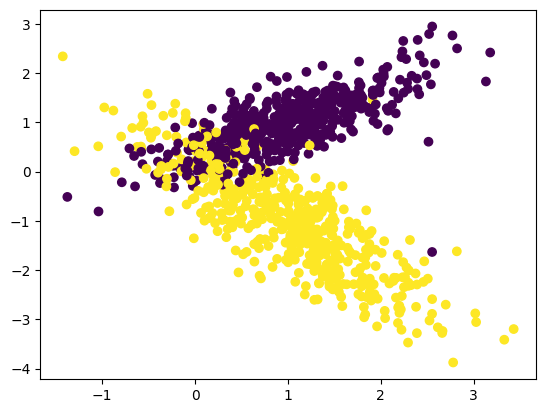

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

X_synthetic, y_synthetic = make_classification(
    n_samples=1000,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1,
)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X_synthetic[:, 0], X_synthetic[:, 1], c=y_synthetic)

X = {
    "setosa_versicolor": data_setosa_versicolor.drop(['target'], axis=1),
    "versicolor_virginica": data_versicolor_virginica.drop(['target'], axis=1),
    "synthetic": X_synthetic
}
y = {
    "setosa_versicolor": data_setosa_versicolor['target'],
    "versicolor_virginica": data_versicolor_virginica['target'].replace({1: 0, 2: 1}),
    "synthetic": y_synthetic
}
X_train, y_train = {}, {}
X_test, y_test = {}, {} 
for k in X:
    X_train[k], X_test[k], y_train[k], y_test[k] = train_test_split(X[k], y[k], test_size=0.2)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

models: dict[str, LogisticRegression] = {}
predictions = {}

for k in X:
    models[k] = LogisticRegression(random_state=0)
    models[k].fit(X_train[k], y_train[k])
    predictions[k] = models[k].predict(X_test[k])
    score = f1_score(y_test[k], predictions[k])
    print(f"{k} - F1 score: {score:.3f}")

setosa_versicolor - F1 score: 1.000
versicolor_virginica - F1 score: 0.957
synthetic - F1 score: 0.892
